# BOOK RECOMMENDATION SYSTEM

<img src="https://www.lislelibrary.org/sites/default/files/assets/images/MyNextBook.jpg" alt="Economic News">

<a href="https://statso.io/book-recommendations-case-study/" target="_blank">Data burada</a>

In [4]:
#!pip install neattext

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import neattext.functions as nfx
import gc
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("books_data.csv")

In [20]:
df.sample(10)

,bookID,title,authors,rating
10016,40329,Metro Girl (Alex Barnaby #1),Janet Evanovich,3.62
10890,44529,The Adventures of Charlie and Mr. Willy Wonka:...,Roald Dahl,4.13
4682,16842,A Single Man,Christopher Isherwood,4.10
10033,40385,The Master Mind of Mars (Barsoom #6),Edgar Rice Burroughs,3.85
3597,13040,Siddhartha,Hermann Hesse,4.02
9306,36598,Bound for Oregon,Jean Van Leeuwen/James Watling/R.W. Alley,3.80
8661,33436,Key Lime Pie Murder (Hannah Swensen #9),Joanne Fluke,3.85
10568,43061,U.S.S. Seawolf (Admiral Arnold Morgan #4),Patrick Robinson,3.96
3403,12442,The Plague Dogs,Richard Adams,3.85
10235,41488,Ghost Ship: A Cape Cod Story,Mary Higgins Clark/Wendell Minor,3.73


In [8]:
df.shape

(11127, 4)

In [9]:
df.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0


In [10]:
# average_ratins çok uzun, adını rating olarak değiştireceğim
df.rename(columns={'average_rating': 'rating'}, inplace=True)

In [12]:
# rating sutunu rakam olduğu halde obj göründü, arada boşluk veya özel karakter olabilir, temizlemek lazım

In [13]:
df['rating'] = df['rating'].str.strip()
df['rating'] = df['rating'].replace({'[^\d.]': ''}, regex=True)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Sayıya çevirirken hata varsa NaN yap

In [14]:
# Rating çoğunlukla 4. çok az 0,1,2 var

<Axes: xlabel='count', ylabel='rating'>

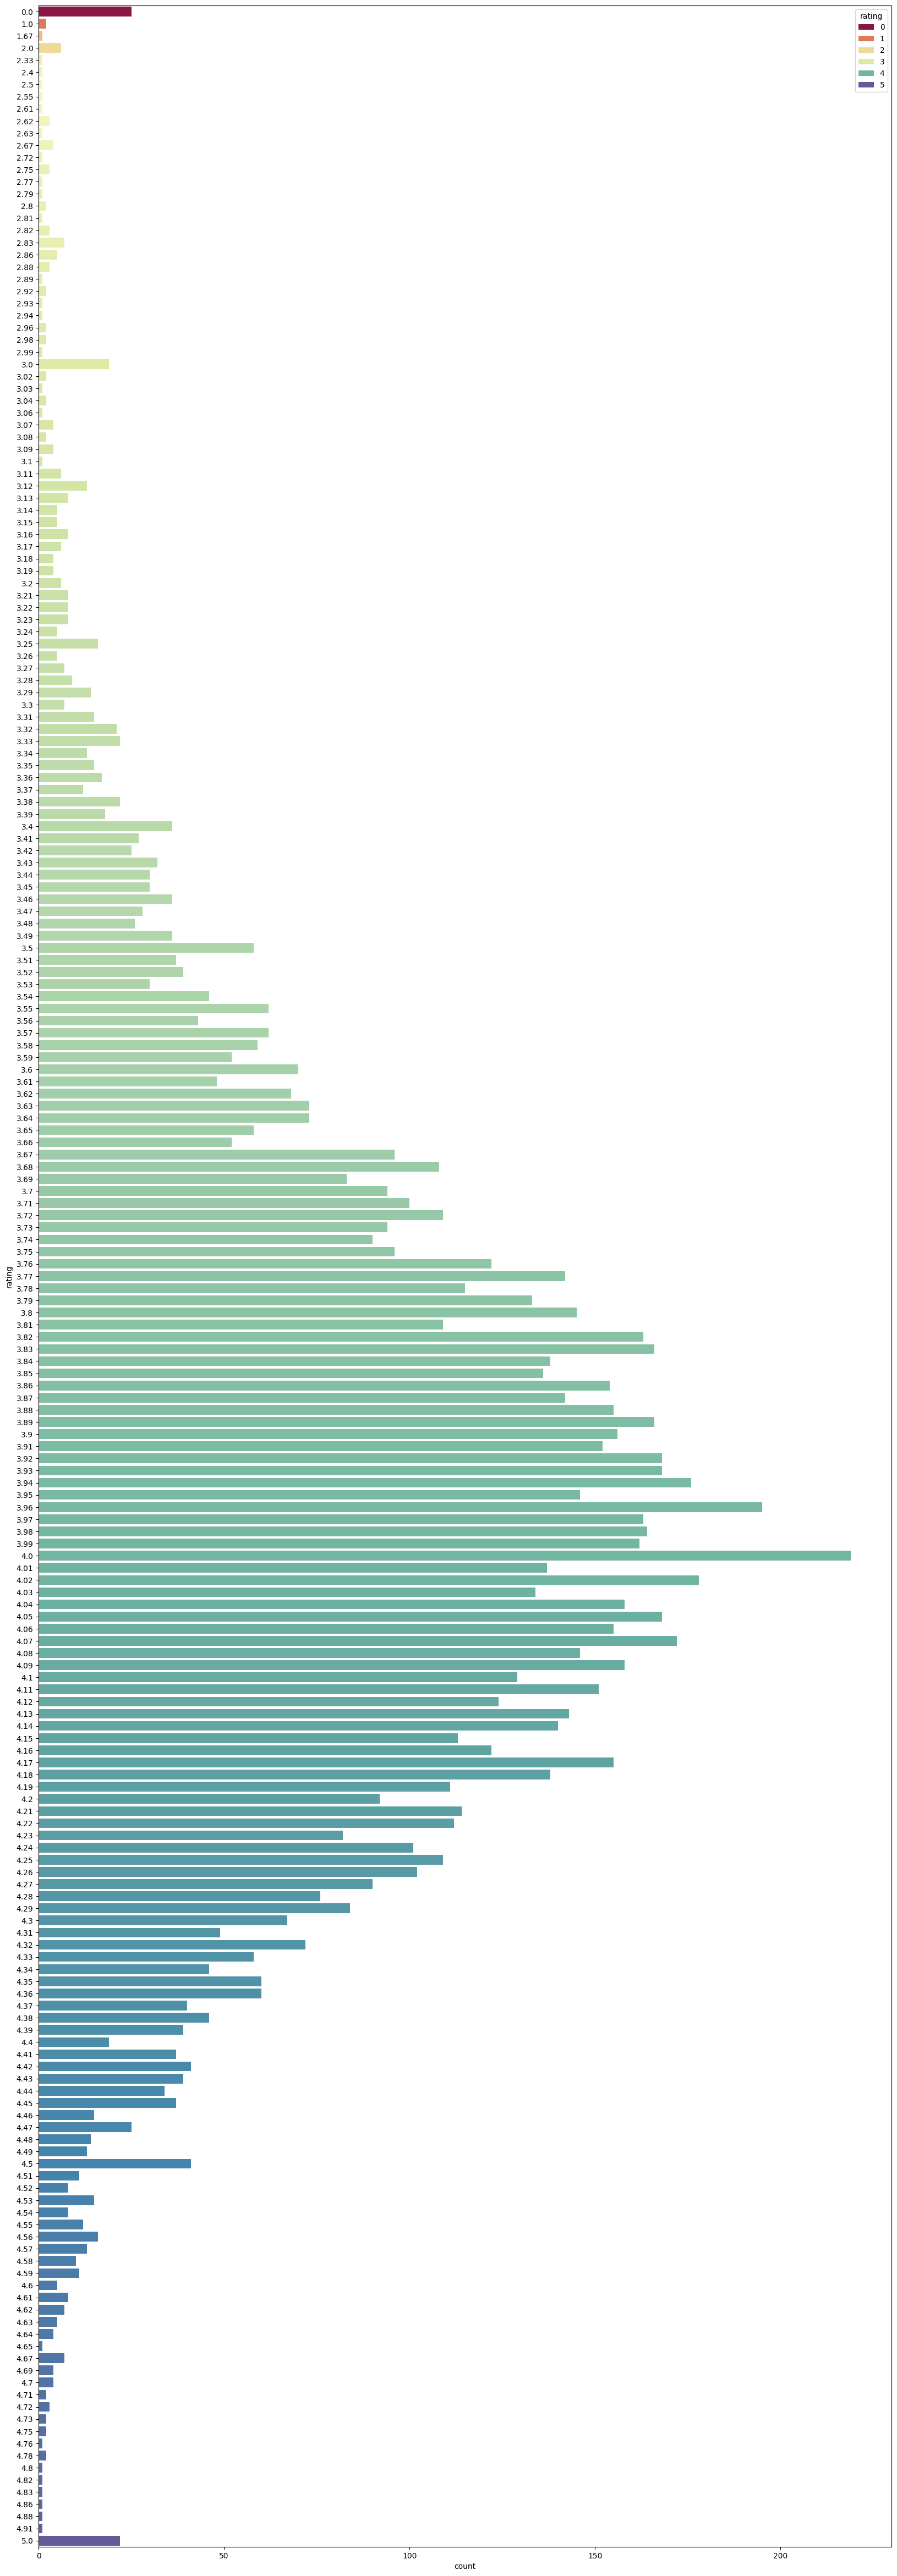

In [15]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['rating'], hue=df['rating'], palette='Spectral')

In [18]:
# Book isimlerini listeye dönüştürme ve örnekleme
book_titles = df["title"].tolist()[:1000]  # İlk 1000 kitap

# Metinleri temizleme
cleaned_titles = [nfx.remove_stopwords(title) for title in article_titles]
cleaned_titles = [nfx.remove_special_characters(title) for title in cleaned_titles]

# TF-IDF vektörleştiricisini oluşturma (max_features ile)
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

# TF-IDF matrisini oluşturma
tfidf_matrix = tfidf.fit_transform(cleaned_titles)

# Kosinüs benzerliğini hesaplama (sparse output)
similarity = cosine_similarity(tfidf_matrix, dense_output=False)

# Sonuçları yazdırma
print("TF-IDF Matrisi:\n", tfidf_matrix)  # Sparse format
print("Kosinüs Benzerliği:\n", similarity)

# Belleği temizleme
del tfidf_matrix
gc.collect()

TF-IDF Matrisi:
   (0, 1381)	0.366347975368586
  (0, 795)	0.366347975368586
  (0, 1368)	0.6092841208866294
  (0, 805)	0.6002925802657257
  (1, 1323)	0.3970013175462436
  (1, 1269)	0.37469270667253984
  (1, 1368)	0.5968381246132302
  (1, 805)	0.5880302563993753
  (2, 1547)	0.36096618464858526
  (2, 303)	0.39932635506352127
  (2, 1368)	0.6003335060392774
  (2, 805)	0.5914740545607347
  (3, 170)	0.39362754374105835
  (3, 1384)	0.39362754374105835
  (3, 1368)	0.5917661091267287
  (3, 805)	0.583033091432875
  (4, 11)	0.5225543805663837
  (4, 228)	0.24811701062433217
  (4, 1560)	0.28816582482780845
  (4, 235)	0.31153383287160585
  (4, 1368)	0.49623402124866434
  (4, 805)	0.4889108230779345
  (5, 1625)	0.35170514484080534
  (5, 109)	0.35170514484080534
  (5, 1232)	0.35170514484080534
  :	:
  (993, 977)	0.894427190999916
  (994, 344)	0.41276074013352804
  (994, 1826)	0.41276074013352804
  (994, 982)	0.41276074013352804
  (994, 915)	0.3603453564683865
  (994, 107)	0.3603453564683865
  (994, 130

0

In [ ]:
# Ratingi 4 olan "A single man" kitabını okuyana ne tavsşye edeceğiz bakalım.

In [21]:
# Kitap isimlerini listeye dönüştürme ve örnekleme
book_titles = df["title"].tolist()[:1000]  # İlk 1000 başlık

# Metinleri temizleme
cleaned_titles = [nfx.remove_stopwords(title) for title in book_titles]
cleaned_titles = [nfx.remove_special_characters(title) for title in cleaned_titles]

# TF-IDF vektörleştiricisini oluşturma (max_features ile)
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

# TF-IDF matrisini oluşturma
tfidf_matrix = tfidf.fit_transform(cleaned_titles)

# Belirli bir başlık
target_title = "A Single Man"

# Başlığı temizleme
cleaned_target_title = nfx.remove_stopwords(target_title)
cleaned_target_title = nfx.remove_special_characters(cleaned_target_title)

# TF-IDF vektörünü oluşturma
target_vector = tfidf.transform([cleaned_target_title])

# Kosinüs benzerliğini hesaplama
similarity_scores = cosine_similarity(target_vector, tfidf_matrix)

# Benzerlik skorlarını ve başlıkları birleştirme
similarity_df = pd.DataFrame(similarity_scores.T, columns=["Similarity"])
similarity_df["title"] = book_titles  # Burada sadece kullanılan başlıkları ekliyoruz

# En benzer başlıkları sıralama (en yüksek benzerlikten en düşük benzerliğe)
recommended_titles = similarity_df.sort_values(by="Similarity", ascending=False)

# İlk 5 tavsiye edilen kitabı yazdırma (kendisi hariç)
print("Tavsiye Edilen Başlıklar:\n", recommended_titles.iloc[1:6])

# Belleği temizleme
del tfidf_matrix
gc.collect()

Tavsiye Edilen Başlıklar:
      Similarity                                              title
136    0.544215                               Jesus the Son of Man
324    0.536138                         The Richest Man in Babylon
323    0.536138                         The Richest Man in Babylon
674    0.396762  Cliffs Notes on Hemingway's The Old Man and th...
670    0.000000                              Jane Austen's Letters


0

In [ ]:
# onerilen kitabın ratingine bakalım, o da 4 müş.

In [25]:
result = df[df['title'].str.lower().str.strip() == 'the richest man in babylon']
# Sonucu yazdırma
print(result[['title', 'rating']])

                          title  rating
323  The Richest Man in Babylon    4.26
324  The Richest Man in Babylon    4.26
